<a href="https://colab.research.google.com/github/ssfatemi/DL-ML-Tutorial/blob/main/DL-python/7_GD_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of stochastic and batch grandient descent in python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Load the dataset in pandas dataframe

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
4,1200,2,51.0
13,1100,2,40.0
17,1540,3,60.0
5,1170,2,38.0
1,2600,4,120.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [4]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

##### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

## Now is the time to implement mini batch gradient descent.

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

###### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

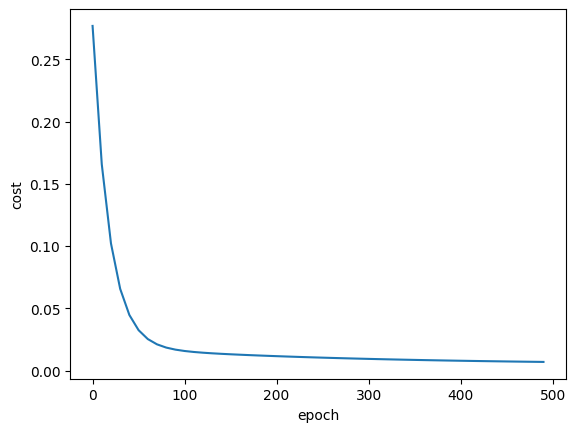

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

###### Lets do some predictions now.

In [7]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [ ]:
predict(1000,2,w,b)

34.60197457980031

In [8]:
predict(1500,3,w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(69.47860785714694)

<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

## Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [9]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

0

In [14]:
def SGD(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # picks only one random sample
        random_index = random.randint(0,total_samples-1) # random index from total samples
        print(i,random_index)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

Streaming output truncated to the last 5000 lines.
5000 13
5001 15
5002 11
5003 1
5004 5
5005 9
5006 15
5007 18
5008 4
5009 9
5010 1
5011 2
5012 1
5013 6
5014 11
5015 15
5016 18
5017 4
5018 14
5019 5
5020 19
5021 14
5022 10
5023 4
5024 3
5025 11
5026 2
5027 6
5028 14
5029 0
5030 7
5031 4
5032 4
5033 3
5034 6
5035 11
5036 0
5037 4
5038 5
5039 2
5040 2
5041 7
5042 10
5043 6
5044 0
5045 8
5046 10
5047 9
5048 3
5049 18
5050 1
5051 10
5052 4
5053 3
5054 2
5055 11
5056 6
5057 10
5058 1
5059 10
5060 9
5061 17
5062 14
5063 4
5064 1
5065 14
5066 16
5067 8
5068 11
5069 4
5070 6
5071 8
5072 17
5073 7
5074 16
5075 16
5076 17
5077 2
5078 7
5079 12
5080 12
5081 12
5082 19
5083 9
5084 1
5085 0
5086 4
5087 6
5088 8
5089 15
5090 11
5091 3
5092 2
5093 6
5094 6
5095 9
5096 18
5097 12
5098 2
5099 6
5100 15
5101 19
5102 9
5103 10
5104 12
5105 18
5106 10
5107 10
5108 4
5109 13
5110 2
5111 0
5112 10
5113 17
5114 10
5115 3
5116 7
5117 4
5118 8
5119 18
5120 8
5121 3
5122 6
5123 11
5124 7
5125 8
5126 16
5127 12

(array([0.70588651, 0.67362245]),
 np.float64(-0.22976668053696656),
 np.float64(0.00024841335761771475))

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [ ]:
w , b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

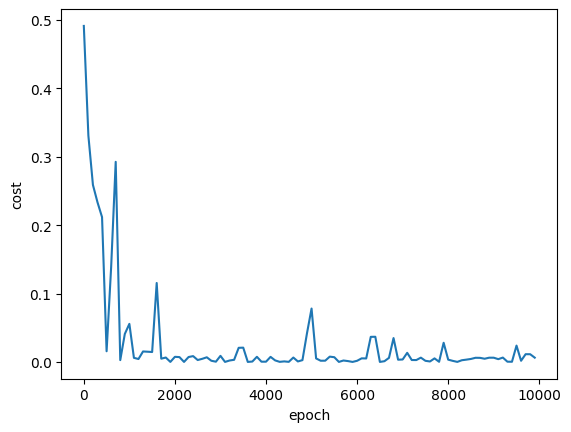

In [12]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

128.25785506303845

In [ ]:
predict(1000,2,w_sgd, b_sgd)

30.347665843402435

In [ ]:
predict(1500,3,w_sgd, b_sgd)

69.45899958796899

<h3 style='color:purple'>Exercise</h3>

#### Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples



In [17]:
def MBGD(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        # picks bunch of random samples ( batch of random samples)
        random_indices = np.random.permutation(total_samples)
        print(i,random_indices)

        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list_MBGD, epoch_list_MBGD = MBGD(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

0 [12  2 15 18 14 17  9  1 19 13  6  4  7  3  0  8 10  5 11 16]
1 [17  6  8  2 14 16  1  3 10  5  4 19 13 12  0 18 15  9 11  7]
2 [ 1  9 12  3 17  5  7 11 18 14  2 13 19  4  0 15  8 10 16  6]
3 [10 19  9  5  0  1 12  4  7  3  8 16 14 11 17  2 18  6 15 13]
4 [14  1 10 12  2 13  8 15 17  3  9 11 19  6 16  0  5 18  4  7]
5 [ 7 19  0 14 15  3 10  5 16  1  2 13 17 11  9  4  6  8 12 18]
6 [16  4  1  9  0  7  6 18 17 10 12  3 15  8 14  5 13  2 19 11]
7 [13 17 15  0  7 19 14  6 18  5  9  8 11 16 10 12  4  1  2  3]
8 [18  4  1  5  3 19 17  6  8 10 12 14 16  7 15  2  0  9 11 13]
9 [12 11 14  8  9  3  7 18  4  6 19 10  2 13  0  1 15 17  5 16]
10 [17  6  3  2  7  9 10  5 15 13 16 14  4  0 11 19  8 18 12  1]
11 [10 12 14 19  2 15  9  8  4 17  5 11  1  6  0 13  7  3 16 18]
12 [ 8 17 16 19  0 15 11 13  7 12 18  5  4  2  3  6 14  1  9 10]
13 [19  0  7 11  2  1  8 15  4 16 13 14 10 18  5  9  6 17  3 12]
14 [18  4  2  6  8 14 11 16 17  0 13 10 19  9  5 12  7 15  3  1]
15 [12  8 15  1 16 10  4  6  0 13  

(array([0.71015609, 0.67819144]),
 np.float64(-0.2331689420195365),
 np.float64(0.01304688986875544))

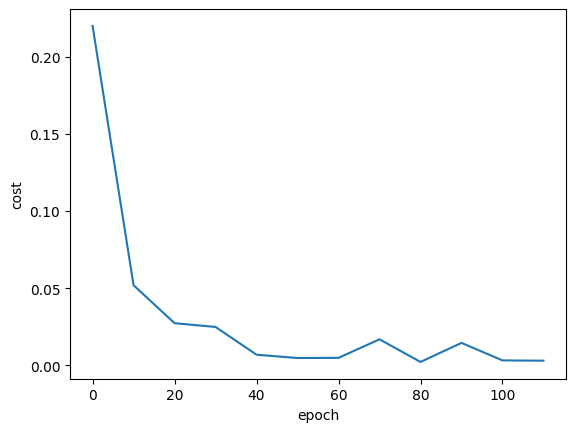

In [19]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_MBGD,cost_list_MBGD)